In [46]:
import folium
import geopandas as gpd
import os
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import numpy as np
import matplotlib.pyplot as plt
import geojson
import rasterio
from rasterio import plot
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import MultiPolygon, Polygon
from osgeo import gdal

In [47]:
t = gpd.read_file(r'tanz.geojson')
t.head()

,id,changeset,problemati,condition,area,geometry
0,1,2017-08-15T07:34:36,None,Complete,332.16015625,"POLYGON ((39.36906 -5.95697, 39.36914 -5.95722..."
1,2,2017-08-15T07:50:23,None,Complete,92.869140625,"POLYGON ((39.36906 -5.95677, 39.36914 -5.95675..."
2,3,2017-08-15T07:50:23,None,Complete,655.560546875,"POLYGON ((39.36858 -5.95638, 39.36880 -5.95646..."
3,4,2017-08-15T07:50:23,None,Complete,196.93994140625,"POLYGON ((39.36861 -5.95730, 39.36865 -5.95745..."
4,5,2017-08-15T07:50:23,None,Complete,169.2265625,"POLYGON ((39.36850 -5.95707, 39.36854 -5.95721..."


In [48]:
m = folium.Map([-6, 39.4], zoom_start=13)
bounds = gpd.read_file(r'tanz.geojson')
folium.GeoJson(bounds).add_to(m)
m

In [49]:
src = rasterio.open(r'tanz.tif')
src.crs

CRS.from_epsg(32737)

In [52]:
la_proj = bounds.to_crs({'init': 'epsg:32737'})

with rasterio.open("tanz.tif") as src:
    out_image, out_transform = mask(src, la_proj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open("tanz_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

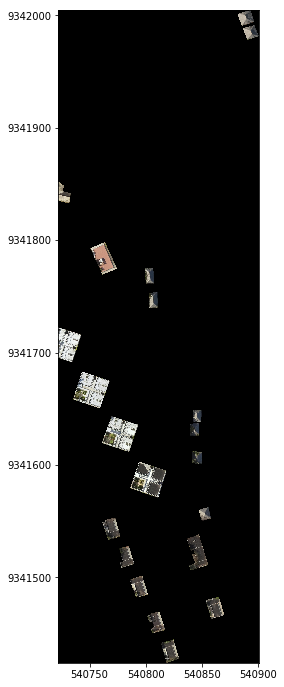

In [53]:
new = rasterio.open(r'tanz_masked.tif')
plt.figure(figsize=(12, 12))
plot.show(new, adjust='linear')